In [1]:
%matplotlib inline

# It is best to start with USE_GPU = False (implying CPU). Switch USE_GPU to True only if you want to use GPU. However... 
# we strongly recommend to wait until you are absolutely sure your CPU-based code works (at least on single image dataset)
USE_GPU = True

# Python Libraries
import random
import math
import numbers
import platform
import copy
import sys
sys.path.append('..')

# Importing essential libraries for basic image manipulations.
import numpy as np
import PIL
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from tqdm import tqdm


import torch
import torchvision
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as tF


from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import importlib
import augmentation_tools
importlib.reload(augmentation_tools)
from augmentation_tools import (showPoly, get_warped_corners_image, get_valid_affine_range,
SSTransformation, square_in_sqare, get_aug_dataset, show_reg_aug_side_by_side,save_im_and_label)


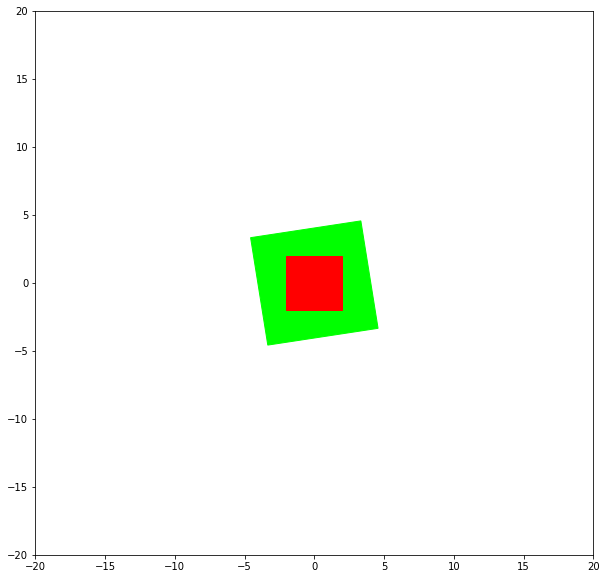

In [2]:
showPoly(outCorners=np.array([[-4.5691323,  3.3351207],[3.3351207,  4.5691323],
                                                       [4.5691323, -3.3351207],[-3.3351207, -4.5691323]]), 
                           inCorners=np.array([[ 2., -2.],[ 2.,  2.],[-2.,  2.],[-2., -2.]]))
    
#     outCorners=np.array([[23.765, 66.235],[66.235, 66.235],[66.235, 23.765],[23.765, 23.765]]), 
#          inCorners=np.array([[-15.5,  15.5],[ 15.5,  15.5],[ 15.5, -15.5],[-15.5, -15.5]]))
 
is_in = square_in_sqare(
    outCorners=np.array([[23.765, 66.235],[66.235, 66.235],[66.235, 23.765],[23.765, 23.765]]), 
    inCorners=np.array([[-15.5,  15.5],[ 15.5,  15.5],[ 15.5, -15.5],[-15.5, -15.5]])
)

assert is_in == False

In [3]:
from skimage.transform import SimilarityTransform
im = np.random.randn(32,32,3)
scale = 1.2248
scaled = get_warped_corners_image(im, SimilarityTransform(scale=scale))

valid_r = get_valid_affine_range(
    warped_corners=scaled['warpedcorners'],orig_corners=scaled['corners'],
    max_=45, affine_type='rotation',threshold=0.001
)
print(valid_r)

15.003890991210938


In [7]:
dataset_regular, dataset_aug = get_aug_dataset(
        dataset='cifar10', 
        use_train=False, 
        data_root_ovr=None, 
        sstransformation=dict(max_r=45.,
    max_t=30.,
    max_s=1.2248, #this scale allows a max rotation of 15
    shape=(32,32,3)),
        seed=1
    )

Files already downloaded and verified
Files already downloaded and verified


In [9]:
save_im_and_label(filepath='../numpy_datasets/cifar10_augmented',dataset=dataset_aug)

/home/therien/Documents/github/adaptive_auto_attack/notebooks/../augmentation_tools.py:94: RuntimeWarning: divide by zero encountered in double_scalars
  return ((y-b)/a,y)


Saving images to ../numpy_datasets/cifar10_augmented_X.npy
Saving labels to ../numpy_datasets/cifar10_augmented_Y.npy


# The following cell vizualizes the cifar dataset with and without augmentations. Even rows are augmented, while odd rows are clean

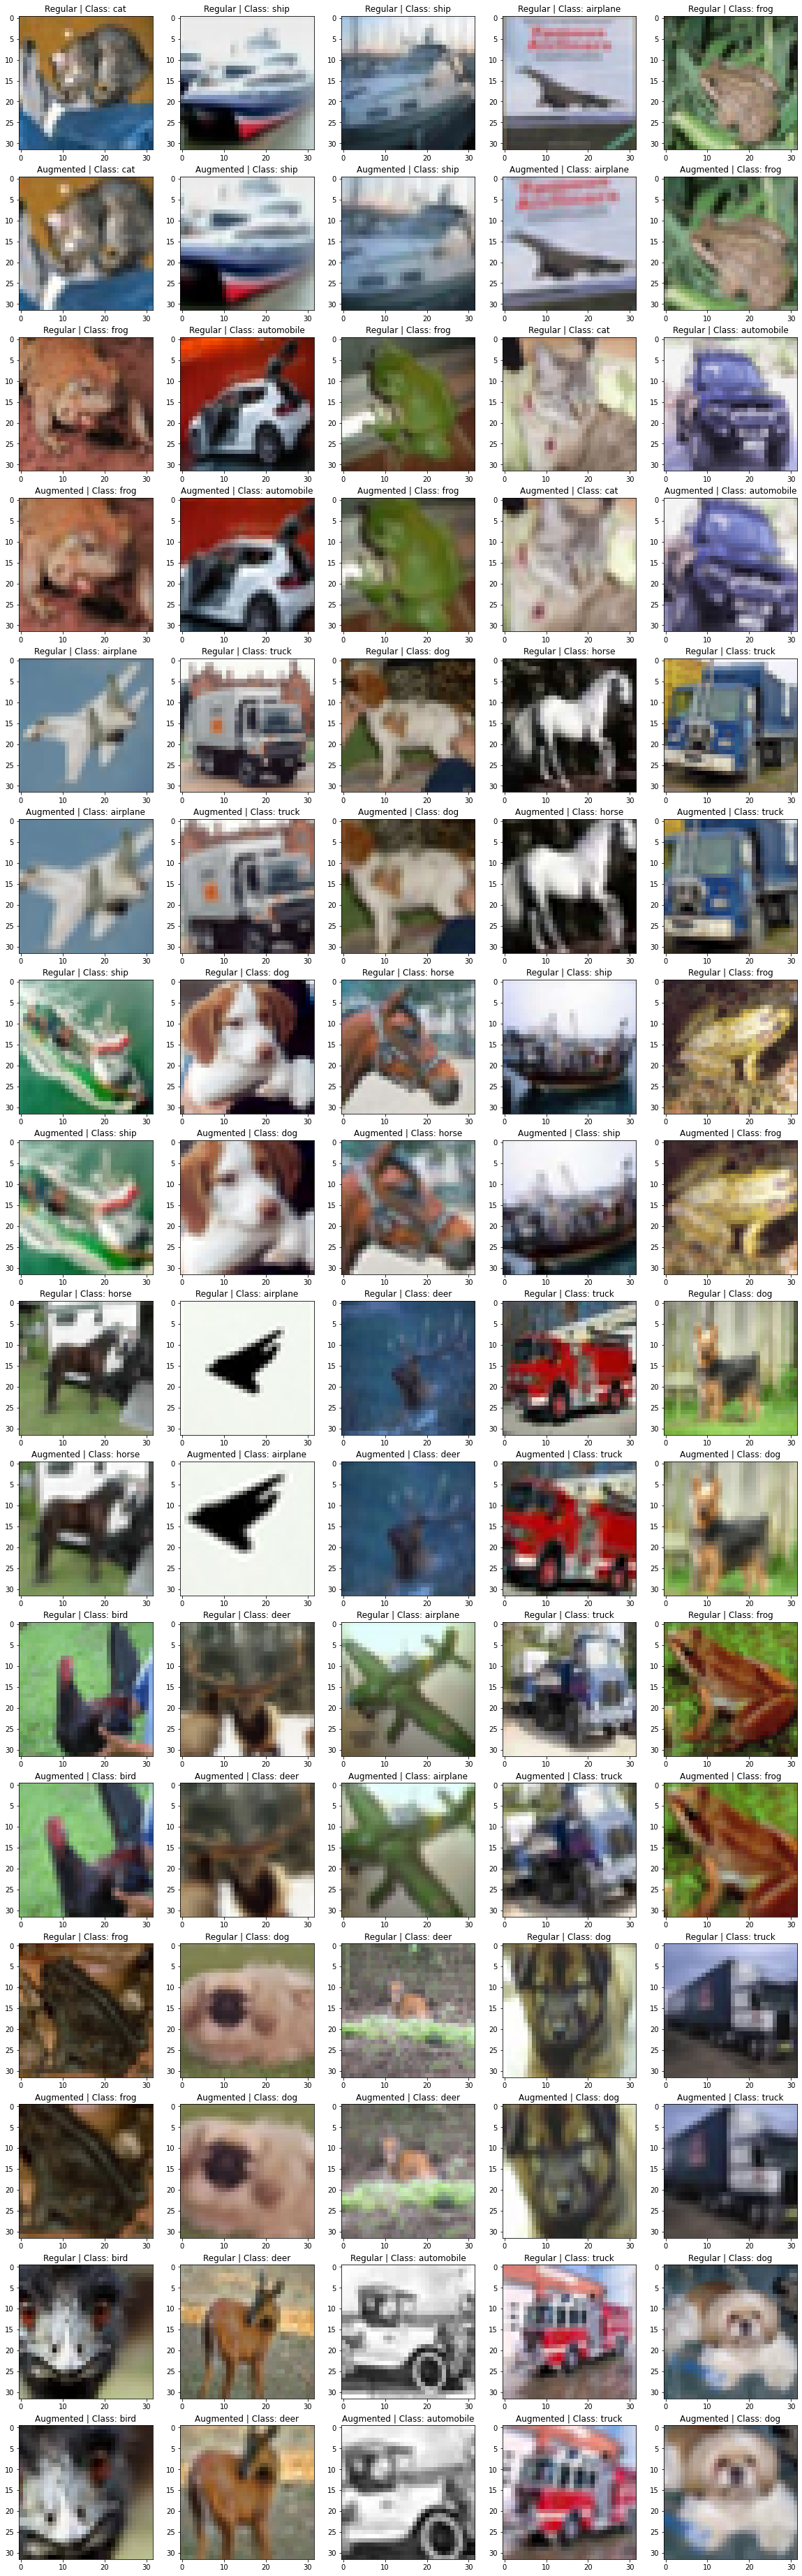

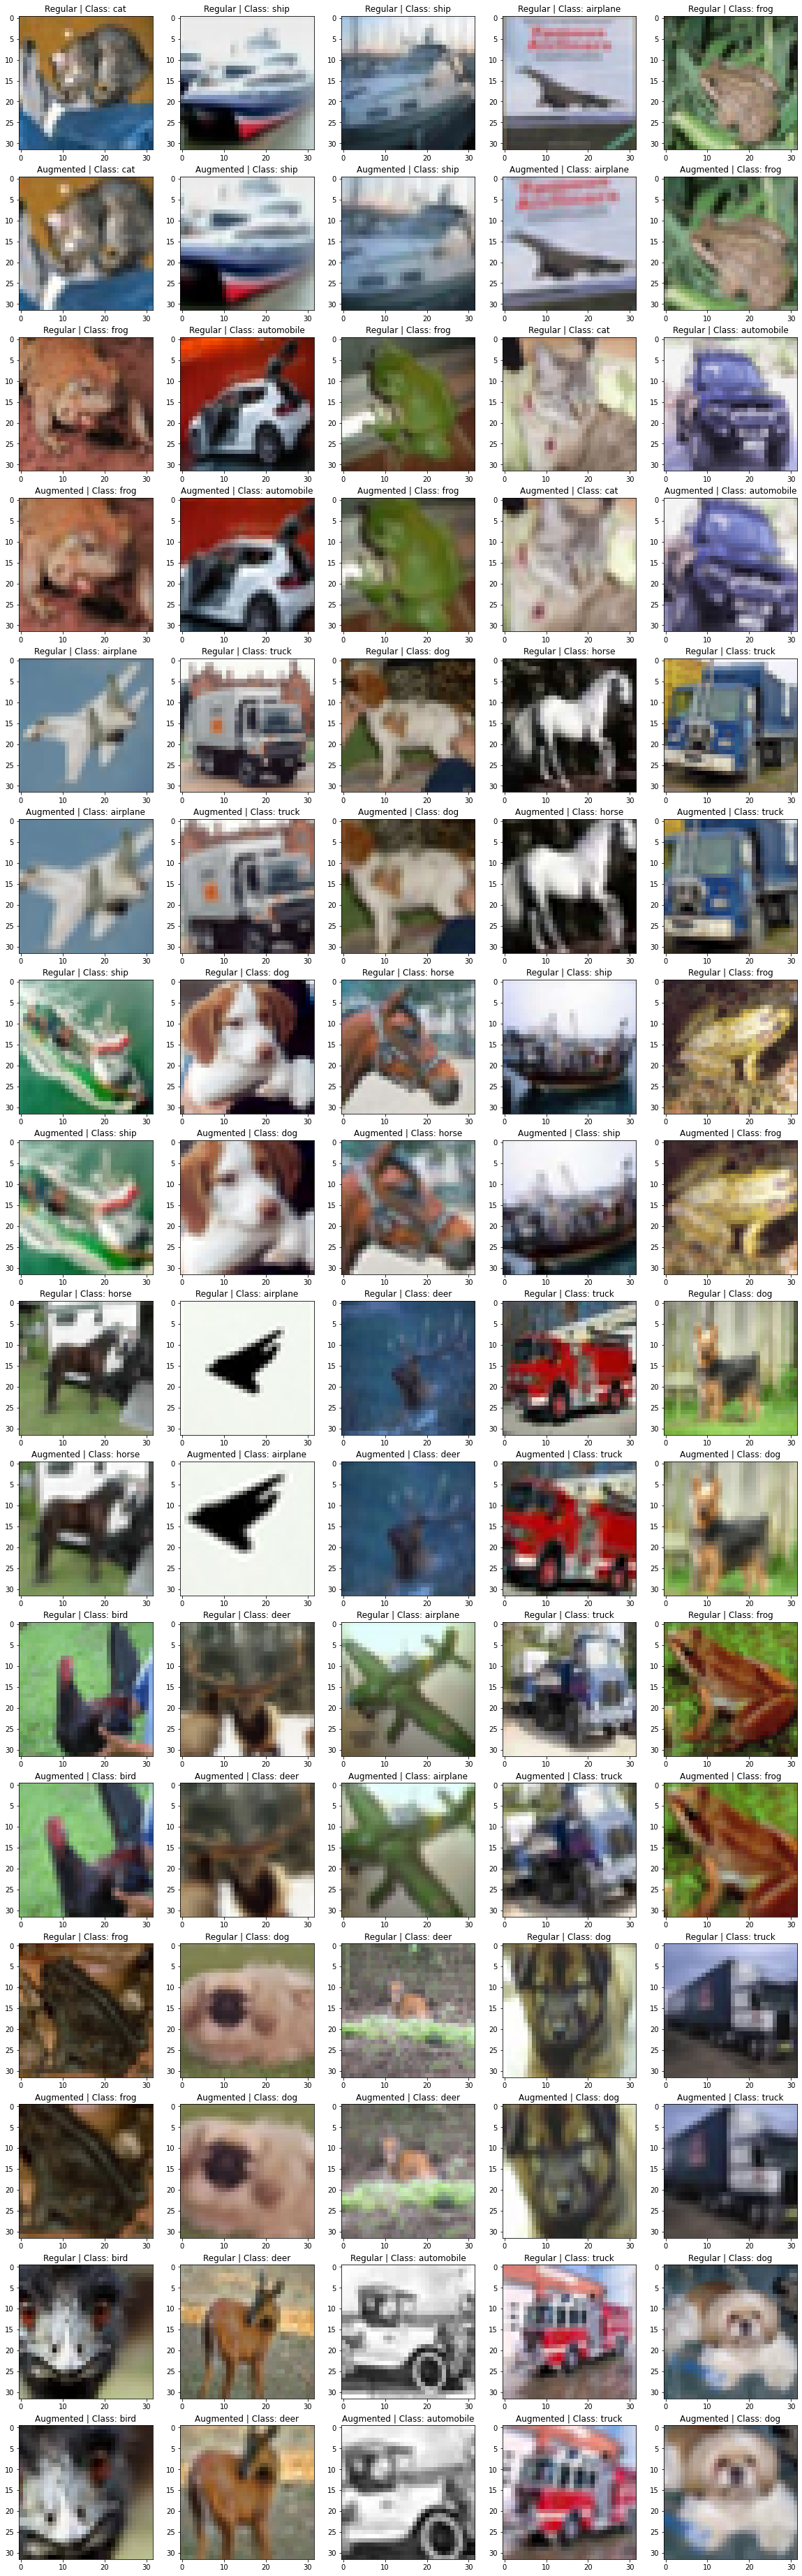

In [10]:
show_reg_aug_side_by_side(
    dataset_regular,
    dataset_aug,
    total_plots=40,
    plots_per_row=5,
    figsize=(20,67),
    savepath=None
)